# Import data and libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')[['Age','Pclass','SibSp','Parch','Survived']]

In [3]:
df.head()

,Age,Pclass,SibSp,Parch,Survived
0,22.0,3,1,0,0
1,38.0,1,1,0,1
2,26.0,3,0,0,1
3,35.0,1,1,0,1
4,35.0,3,0,0,0


In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,Age,Pclass,SibSp,Parch,Survived
0,22.0,3,1,0,0
1,38.0,1,1,0,1
2,26.0,3,0,0,1
3,35.0,1,1,0,1
4,35.0,3,0,0,0


In [6]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [7]:
X.head()

,Age,Pclass,SibSp,Parch
0,22.0,3,1,0
1,38.0,1,1,0
2,26.0,3,0,0
3,35.0,1,1,0
4,35.0,3,0,0


In [8]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))

np.float64(0.6933333333333332)

## Applying Feature Construction

In [9]:
X['Family_size'] = X['SibSp'] + X['Parch'] + 1

In [10]:
X.head()

,Age,Pclass,SibSp,Parch,Family_size
0,22.0,3,1,0,2
1,38.0,1,1,0,2
2,26.0,3,0,0,1
3,35.0,1,1,0,2
4,35.0,3,0,0,1


In [11]:
def myfunc(num):
    if num == 1:
        #alone
        return 0
    elif num >1 and num <=4:
        # small family
        return 1
    else:
        # large family
        return 2

In [12]:
myfunc(4)

1

In [13]:
X['Family_type'] = X['Family_size'].apply(myfunc)

In [14]:
X.head()

,Age,Pclass,SibSp,Parch,Family_size,Family_type
0,22.0,3,1,0,2,1
1,38.0,1,1,0,2,1
2,26.0,3,0,0,1,0
3,35.0,1,1,0,2,1
4,35.0,3,0,0,1,0


In [15]:
X.drop(columns=['SibSp','Parch','Family_size'],inplace=True)

In [16]:
X.head()

,Age,Pclass,Family_type
0,22.0,3,1
1,38.0,1,1
2,26.0,3,0
3,35.0,1,1
4,35.0,3,0


In [17]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))

np.float64(0.7003174603174602)

## Feature Splitting

In [18]:
df = pd.read_csv('train.csv')

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [21]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [22]:
df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: 0, Length: 891, dtype: object

In [23]:
df[['Title','Name']]

,Title,Name
0,Mr,"Braund, Mr. Owen Harris"
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss,"Heikkinen, Miss. Laina"
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr,"Allen, Mr. William Henry"
...,...,...
886,Rev,"Montvila, Rev. Juozas"
887,Miss,"Graham, Miss. Margaret Edith"
888,Miss,"Johnston, Miss. Catherine Helen ""Carrie"""
889,Mr,"Behr, Mr. Karl Howell"


In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [34]:
df.groupby('Title').count()['Survived'].sort_values(ascending=False)

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Capt              1
Lady              1
Don               1
Jonkheer          1
Mme               1
Ms                1
Sir               1
the Countess      1
Name: Survived, dtype: int64

In [43]:
df['Is_Married'] = 0

# old style 
# update on pandas 3.0
# df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1
# df.loc[row_indexer, "col"] = values

df.loc[df['Title'] == 'Mrs', 'Title'] = 1

<Axes: xlabel='Is_Married'>

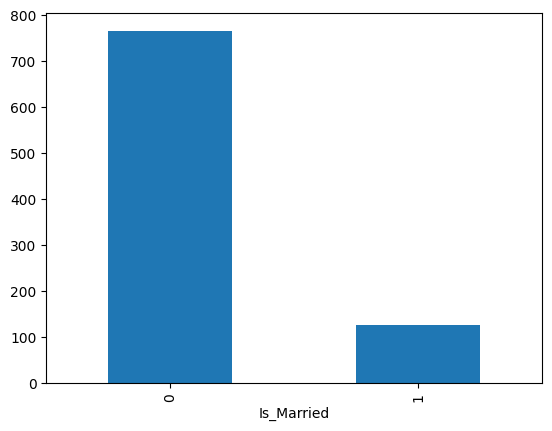

In [ ]:
df['Is_Married'].value_counts().plot(kind='bar')